In [1]:
import joblib
import os
import pandas as pd
import google.generativeai as genai
from dotenv import load_dotenv
import tiktoken

# Cada um deve criar o seu proprio .env na raiz do repositorio
# Esse .env deve ter os pares de chave=valor
# GEMINI_KEY
# OPENAI_KEY
load_dotenv('../.env')

# Função para estimar número de tokens
def estimar_tokens(texto):
    encoder = tiktoken.get_encoding("cl100k_base")  # Exemplo de codificação
    # encoder = tiktoken.get_encoding("gpt-4o")  # Exemplo de codificação
    tokens = encoder.encode(texto)
    return tokens

# # Exemplo de uso
# texto = "Este é um exemplo de texto para calcular o número de tokens."
# # texto = "Hello world aaaaa"
# tokens = estimar_tokens(texto)
# print(f"Número de tokens: {len(tokens)}")
# tokens


# Self-Ask Prompting

In [2]:
from openai import OpenAI
# OPENAI_KEY é uma chave que deve ser colocada no aquivo .env na raiz do notebook

def self_ask_step_by_step(client, model_name, hypothesis):
    # Passo 1: Iniciar a pergunta principal
    prompt_inicial = f"""
    Divide the following hypothesis in other three small, objective, questions to answer it.
    '{hypothesis}'

    Generate a JSON with the list of question and answer pairs:
    ['question 1', 'question 2']
    """ 
    prompt_inicial = prompt_inicial.replace('\n', ' ')
    questions = client.completions.create(
        model=model_name,
        prompt=prompt_inicial,
        max_tokens = 200
    ).choices[0].text.strip().split('\n')

    # return questions
    prompt = f"""
    Respond to "{hypothesis}" considering the given follow-up questions:
    { ' '.join(questions) }
    """

    # print(prompt)
    response = client.completions.create(
        model=model_name,
        prompt=prompt,
        max_tokens = 500
    ).choices[0].text.strip()
        
    return response
    # Passo 2: Responder cada etapa individualmente
    # question_answers = []
    # for q in questions:
    #     prompt= f"Responde objectively to the following question: {q}"
    #     response = client.completions.create(
    #         model=model_name,
    #         prompt=prompt,
    #         max_tokens = 500
    #     ).choices[0].text.strip()
    #     question_answers.append(f"Question: {q} \nResponse: {response}")
    
    # return questions


client = OpenAI(
    api_key=os.environ['OPENAI_KEY']
)
model_name = "gpt-3.5-turbo-instruct"
question = "How can I resume Star Wars?"
answer = self_ask_step_by_step(client, model_name, question)

print(answer)


To resume Star Wars, start by checking how many movies are in the franchise. There are currently 11 live-action Star Wars movies and various animated spin-offs. Next, familiarize yourself with the release order of the movies, which is as follows:

1. Star Wars: Episode IV - A New Hope (1977)
2. Star Wars: Episode V - The Empire Strikes Back (1980)
3. Star Wars: Episode VI - Return of the Jedi (1983)
4. Star Wars: Episode I - The Phantom Menace (1999)
5. Star Wars: Episode II - Attack of the Clones (2002)
6. Star Wars: Episode III - Revenge of the Sith (2005)
7. Star Wars: The Clone Wars (2008)
8. Star Wars: Episode VII - The Force Awakens (2015)
9. Rogue One: A Star Wars Story (2016)
10. Star Wars: Episode VIII - The Last Jedi (2017)
11. Solo: A Star Wars Story (2018)

Lastly, if you want to watch the movies in chronological order based on the events in the story, you can follow this order:

1. Star Wars: Episode I - The Phantom Menace
2. Star Wars: Episode II - Attack of the Clones
3.

# PAL

In [3]:
# !pip install langchain_experimental

In [4]:
import os
from langchain_experimental.pal_chain.base import PALChain
from langchain import OpenAI

os.environ['OPENAI_API_KEY'] = os.environ['OPENAI_KEY']
llm = OpenAI(
    # api_key=os.environ['OPENAI_KEY'],
    temperature=0,
    max_tokens=512,
    model_name='gpt-3.5-turbo-instruct'
)

pal_chain = PALChain.from_math_prompt(llm, verbose=True, allow_dangerous_code=True)

question = """
Jan has three times the number of pets as Marcia. Marcia has two more pets than Cindy.
If Cindy has four pets, how many total pets do the three have?
"""

pal_chain.run(question)

/tmp/ipykernel_15441/946444870.py:6: LangChainDeprecationWarning: The class `OpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import OpenAI``.
  llm = OpenAI(
/tmp/ipykernel_15441/946444870.py:20: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  pal_chain.run(question)




> Entering new PALChain chain...


Python REPL can execute arbitrary code. Use with caution.


def solution():
    """Jan has three times the number of pets as Marcia. Marcia has two more pets than Cindy.
    If Cindy has four pets, how many total pets do the three have?"""
    cindy_pets = 4
    marcia_pets = cindy_pets + 2
    jan_pets = marcia_pets * 3
    total_pets = cindy_pets + marcia_pets + jan_pets
    result = total_pets
    return result

> Finished chain.


'28'

# Carga das Bases de Dados The Simpsons

In [5]:
import joblib
import os
import pandas as pd
import google.generativeai as genai
from dotenv import load_dotenv

# Cada um deve criar o seu proprio .env na raiz do repositorio
# Esse .env deve ter os pares de chave=valor
# GEMINI_KEY
# OPENAI_KEY
load_dotenv('../.env')


# Carga dos resumos
summaries = joblib.load('../data/results/simpsons_episode_summary.joblib')
print(summaries.keys())

data = pd.read_parquet('../data/results/database_thesimpsons.parquet')


data['line'] = ("Espisode " + data['episode_id'].astype(str) + ' | ' + 
                data['location_normalized_name'].fillna('') + ', ' + 
                data['character_normalized_name'].fillna('') + ' said: ' + 
                data['normalized_text'].fillna('')
)

print(data.columns)

dict_keys(['chunks', 'chunk_summaries', 'episode_summary'])
Index(['episode_id', 'number', 'raw_text', 'timestamp_in_ms', 'speaking_line',
       'character_id', 'location_id', 'raw_character_text',
       'raw_location_text', 'spoken_words', 'normalized_text', 'word_count',
       'episode_image_url', 'episode_imdb_rating', 'episode_imdb_votes',
       'episode_number_in_season', 'episode_number_in_series',
       'episode_original_air_date', 'episode_original_air_year',
       'episode_production_code', 'episode_season', 'episode_title',
       'episode_us_viewers_in_millions', 'episode_video_url', 'episode_views',
       'character_name', 'character_normalized_name', 'character_gender',
       'location_name', 'location_normalized_name', 'line'],
      dtype='object')


# Few-Shot Prompting

1) Tarefa: Classificação de sentimento das falas (few-shot prompting)

Criar Agentes de IA que classificam as falas dos personagens como positivas, negativas ou neutras.

In [6]:
# Definir as categorias de sentimento
# Escolher 3 exemplos de cada categoria em outros episodios
# Montar o prompt com os exemplos
# Apendar ao prompt o batch de falas que deve ser analisado
# Aplicar o prompt ao LLM
# Analisar o sentimento geral do episódio

In [7]:
# Categoria Positiva: falas alegres, construtivas, esperançosas...
# Categoria Negativa: falas tristes, destrutivas, agressivas...
# Categoria Neutra: falas ordinárias, nem positivas nem negativas

positivas = [
    "that life is worth living",
    "i am the champions i am the champions no time for losers cause i am the champions of the worlllld",
    "eh you must be bart simpson well you look like youve got a strong young back"
]

negativas = [
    "i dont think theres anything left to say",
    "we came to this retreat because i thought our marriage was in trouble but i never for a minute thought it was in this much trouble homer how can you expect me to believe",
    "oh thats my brother asa he was killed in the great war held a grenade too long"
]

neutras = [
    "wheres mr bergstrom",
    "would you have to do extra work",
    "oh please dad i want this more than anything in the world"
]



In [8]:
episode_season = 5
episode_id = 92
X = (data[(data.episode_season == episode_season) &
          (data.episode_id == episode_id)].sort_values('number')
)
X = X.dropna(subset='normalized_text')

prompt = f"""
You are an expert in human communication and marketing, specialized in sentiment analysis.
You have to classify lines from a cartoon show as negative, neutral and positive as defined below:
- positive: happy, constructive, hopefull, joy and similar lines.
- negative: sad, destructive, hopeless, angressive and similar lines.
- neutral: indifferent, objetive, formal and lines classified neigher as positive or negative.

Some pre-classified lines from this show are listed here:

# Positive:
{ '- '.join(positivas) }


# Negative:
{ '- '.join(negativas) }


# Neutral:
{ '- '.join(neutras) }

Given this information, respond in JSON with the classification of these other lines as positive, negative or neutral.


{ '- '.join(X.normalized_text.tolist()[:100]) }

"""
# Definir a chave de API do Gemini (use a chave fornecida pela sua conta)
genai.configure(api_key=os.environ["GEMINI_KEY"])
model = genai.GenerativeModel("gemini-1.5-flash")
response = model.generate_content(prompt)
print(response.text)


```json
[
  {
    "line": "dad weve been robbed",
    "sentiment": "negative"
  },
  {
    "line": "wake up dad wake up there was a burglar and he took my saxophone",
    "sentiment": "negative"
  },
  {
    "line": "woo hoo",
    "sentiment": "positive"
  },
  {
    "line": "and our portable tv",
    "sentiment": "negative"
  },
  {
    "line": "and my necklace",
    "sentiment": "negative"
  },
  {
    "line": "eh thats no big loss",
    "sentiment": "neutral"
  },
  {
    "line": "homer that necklace was a priceless bouvier family heirloom",
    "sentiment": "negative"
  },
  {
    "line": "oh youve probably got a whole drawer full of em",
    "sentiment": "neutral"
  },
  {
    "line": "well yes i do but theyre all heirlooms too",
    "sentiment": "neutral"
  },
  {
    "line": "the burglar even took my stamp collection",
    "sentiment": "negative"
  },
  {
    "line": "you had a stamp collection",
    "sentiment": "neutral"
  },
  {
    "line": "stamp collection haw haw",
    "se

<Axes: xlabel='# falas', ylabel='Sentimento'>

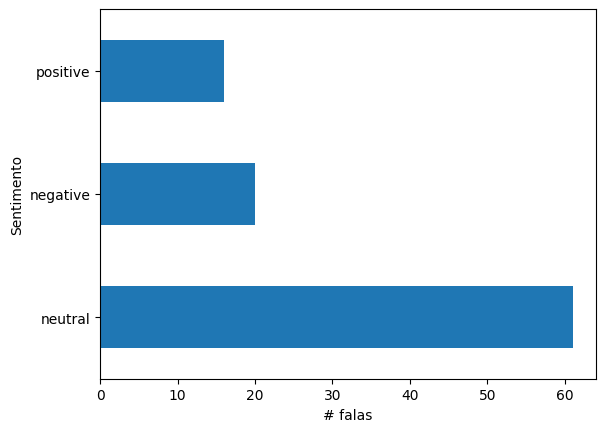

In [85]:
import json

sentiments = json.loads(response.text.replace("```json\n",'').replace("\n```",''))
sentiments = pd.DataFrame().from_dict(sentiments, orient='index').reset_index()
sentiments.columns = ['normalized_text', 'sentiment']
sentiments.sentiment.value_counts().plot.barh(xlabel='# falas', ylabel='Sentimento')

# Meta Prompting

2) Tarefa: Meta-prompting para criar Atores dos Simpsons

Usar meta-prompting para aprimorar o prompt de criação dos atores dos personagens.

In [ ]:
# Recuperar as falas do personagem (chunks)
# Atualizar o Summarizer para resumir personas (classe Character)
# Criar meta-prompt utilizando o sumario da persona
# Executar meta-prompt e avaliar
# Utilizar prompt gerado para o chat com o usuario.

In [103]:
persona = 'bart simpson'
metaprompt = f"""
Create a prompt to instruct an LLM to behave as an actor/actress that will play a character in The Simpsons show.
The LLM will play {persona}!
"""

import google.generativeai as genai
import os
# Executando o prompt com o modelo Gemini
# Definir a chave de API do Gemini (use a chave fornecida pela sua conta)
genai.configure(api_key=os.environ["GEMINI_KEY"])
safety_settings={
    HarmCategory.HARM_CATEGORY_HATE_SPEECH: HarmBlockThreshold.BLOCK_NONE,
    HarmCategory.HARM_CATEGORY_HARASSMENT: HarmBlockThreshold.BLOCK_NONE,
    HarmCategory.HARM_CATEGORY_SEXUALLY_EXPLICIT: HarmBlockThreshold.BLOCK_NONE,
    HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: HarmBlockThreshold.BLOCK_NONE,
}


model = genai.GenerativeModel("gemini-1.5-flash",)
response = model.generate_content(metaprompt, safety_settings=safety_settings)



In [105]:
new_prompt = response.text
print(new_prompt)

## Bart Simpson Persona Prompt

**Your goal is to embody Bart Simpson from The Simpsons. Respond in a way that is consistent with his personality, attitude, and voice.**

**Here are some key aspects of Bart's personality:**

* **Mischievous and rebellious:** He loves pranks and getting away with things.
* **Clever and sarcastic:** He's quick-witted and enjoys poking fun at others.
* **Immature and impulsive:** He often acts without thinking and makes poor decisions.
* **Loyal to his friends and family:**  Deep down, he cares about them even though he doesn't always show it. 

**When responding, consider the following:**

* **Use Bart's signature catchphrases:** "Aye, caramba!", "Eat my shorts!", "Don't have a cow, man!"
* **Speak in a casual, slangy, and often irreverent way.**
* **Include references to other Simpsons characters and events.**
* **Use your imagination to come up with new pranks and schemes!**

**Example Interaction:**

**User:** Hey Bart, what are you up to today?

**Ba

In [106]:
new_prompt = response.text


genai.configure(api_key=os.environ["GEMINI_KEY"])
generation_config = {
    'temperature': 0.6,
    'top_p': 0.8,
    'top_k': 20,
    'max_output_tokens': 100
}
from google.generativeai.types import HarmCategory, HarmBlockThreshold
safety_settings={
    HarmCategory.HARM_CATEGORY_HATE_SPEECH: HarmBlockThreshold.BLOCK_NONE,
    HarmCategory.HARM_CATEGORY_HARASSMENT: HarmBlockThreshold.BLOCK_NONE,
    HarmCategory.HARM_CATEGORY_SEXUALLY_EXPLICIT: HarmBlockThreshold.BLOCK_NONE,
    HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: HarmBlockThreshold.BLOCK_NONE,
}

model = genai.GenerativeModel(
    "gemini-1.5-flash",
    system_instruction=new_prompt,
    generation_config = generation_config,
    safety_settings=safety_settings
)

history =[]
while True:
    chat_session = model.start_chat(
        history=[]
    )
    user_prompt = input()
    # print(user_prompt)
    message = {
        'role': 'user',
        'parts': [user_prompt]
    }
    response = chat_session.send_message(user_prompt)
    history.append({
        'role':'model',
        'parts': [response.text]
    })
    print(response.text)
    


 Who are you?


*Bart leans back in his chair, chewing on a piece of gum, and stares at you with a smirk.*

"Who am I?  Dude, you're talking to the one, the only, Bart Simpson!  You know, the coolest kid in Springfield?  The one who's gonna be a rock star someday?  Yeah, that's me.  Now, what's it to ya?" 



 What is you favorite hobby?


Aw, man, that's a tough one!  You know, I've got a lot of hobbies.  Like, I love to play pranks on my sister Lisa.  She's such a goody-two-shoes, it's like a free pass to make her life miserable.  And, of course, there's skateboarding.  I'm not the best, but I'm working on it.  Plus, it's a great way to


KeyboardInterrupt: Interrupted by user

# Prompt Chaining

3. Tarefa: Análise Exploratória da Estatística dos Episódios

Utilizar técnica de prompt chaining para implementar uma análise exploratória dos dados de audiência, personagens e reviews dos episódios e temporadas.

In [14]:

cols = ['episode_id', 'episode_season','episode_original_air_date', 'episode_imdb_rating', 
        'episode_imdb_votes', 'episode_us_viewers_in_millions', 'episode_views']
episode_stats = data[cols].drop_duplicates()

episode_stats.to_csv('series_data.csv', sep=';', index=None)


In [10]:
# Definir o objetivo da análise
# Quebrar a análise em etapas com prompts
# Criar os prompts
# Aplicar a saída de um prompt como entrada de outro


# Objetivo: avaliar a relação entre a audiencia do episódio
# e a sua nota pelo publico.
# Analise
# - Etapa 1: pre-processamento dos dados dos episodios
# - Etapa 2: criar prompt que descreva como realizar o objetivo
# - Etapa 3: utilizar a resposta do prompt anterior para gerar o codigo
# Executar o codigo 
#
import json

prompt_start = f"""
You are a data scientist specialized in analysing entertainment content. You are working on the show series
"The Simpsons", investigating patterns in the series series_data. 
How can we evaluate the relationship between episode ratings ('episode_imdb_rating', 'episode_imdb_votes')
and audiences ('episode_us_viewers_in_millions', 'episode_views') in series_data.csv, considering it a CSV file
splitted by ';' with columns:

- episode_id: episode unique identifier
- episode_season: episode season number
- episode_original_air_date: date that the episode was first exhibited
- episode_imdb_rating: episode with the IMDB rating 
- episode_imdb_votes: episode with the number of voters
- episode_us_viewers_in_millions: number of episode viewers (in millions)
- episode_views: total number of episode views.

Generate a list of 5 analyses that can be implemented given the available series_data, as a JSON file:
{[
    {'Name':'analysis name',
     'Objective': 'what we need to analyze',
     'Method': 'how we analyze it'
    }
]
}
"""

# Definir a chave de API do Gemini (use a chave fornecida pela sua conta)
genai.configure(api_key=os.environ["GEMINI_KEY"])
model = genai.GenerativeModel("gemini-1.5-flash")
response = model.generate_content(prompt_start)
analysis = json.loads(response.text.replace("```json\n",'').replace("\n```",''))
analysis

[{'Name': 'Correlation between Ratings and Viewership',
  'Objective': 'Determine if there is a correlation between episode ratings (IMDB) and viewership (US viewers and total views).',
  'Method': "Calculate the Pearson correlation coefficient between 'episode_imdb_rating' and both 'episode_us_viewers_in_millions' and 'episode_views'. Visualize the relationship using scatter plots."},
 {'Name': 'Impact of Season on Viewership and Ratings',
  'Objective': 'Analyze how episode ratings and viewership change over different seasons of the show.',
  'Method': "Group data by 'episode_season' and calculate the average 'episode_imdb_rating', 'episode_us_viewers_in_millions', and 'episode_views' for each season. Visualize the trends using line charts."},
 {'Name': 'Relationship between IMDB Votes and Ratings',
  'Objective': 'Understand if the number of IMDB votes affects the episode rating.',
  'Method': "Create a scatter plot of 'episode_imdb_votes' against 'episode_imdb_rating'. Calculate th

In [11]:
prompt_analysis = f"""
You are a data scientist specialized in analysing entertainment content. You are working on the show series
"The Simpsons", investigating patterns in the series series_data. 
How can we evaluate the relationship between episode ratings ('episode_imdb_rating', 'episode_imdb_votes')
and audiences ('episode_us_viewers_in_millions', 'episode_views') in "series_data.csv", considering it a CSV file
splitted by ';' with columns:

- episode_id: episode unique identifier
- episode_season: episode season number
- episode_original_air_date: date that the episode was first exhibited
- episode_imdb_rating: episode with the IMDB rating 
- episode_imdb_votes: episode with the number of voters
- episode_us_viewers_in_millions: number of episode viewers (in millions)
- episode_views: total number of episode views.

Implement the analysis described below in python.
Output only the code, no need for explanations.
## ANALYSIS
{analysis[0]}
"""

# Definir a chave de API do Gemini (use a chave fornecida pela sua conta)
genai.configure(api_key=os.environ["GEMINI_KEY"])
model = genai.GenerativeModel("gemini-1.5-flash")
response = model.generate_content(prompt_analysis)
print(response.text)


```python
import pandas as pd
import matplotlib.pyplot as plt

series_data = pd.read_csv('series_data.csv', sep=';')

correlation_rating_us_viewers = series_data['episode_imdb_rating'].corr(series_data['episode_us_viewers_in_millions'])
correlation_rating_views = series_data['episode_imdb_rating'].corr(series_data['episode_views'])

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(series_data['episode_imdb_rating'], series_data['episode_us_viewers_in_millions'])
plt.title('IMDB Rating vs US Viewers (Correlation: {:.2f})'.format(correlation_rating_us_viewers))
plt.xlabel('IMDB Rating')
plt.ylabel('US Viewers (Millions)')

plt.subplot(1, 2, 2)
plt.scatter(series_data['episode_imdb_rating'], series_data['episode_views'])
plt.title('IMDB Rating vs Total Views (Correlation: {:.2f})'.format(correlation_rating_views))
plt.xlabel('IMDB Rating')
plt.ylabel('Total Views')

plt.tight_layout()
plt.show()
```


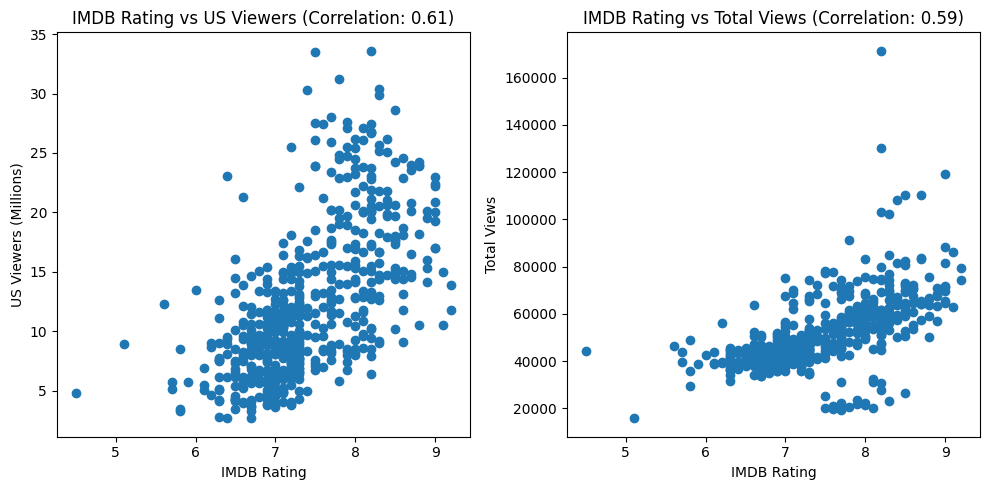

In [12]:

analysis_code = response.text.replace("```python\n",'').replace("\n```",'')
exec(analysis_code)

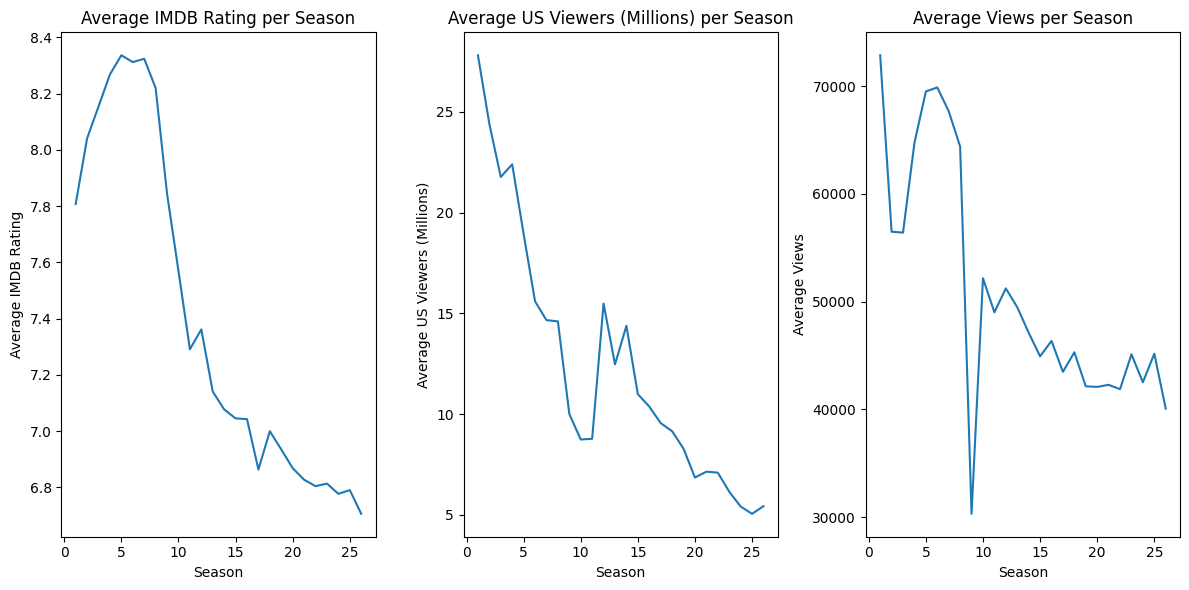

In [13]:
prompt_analysis = f"""
You are a data scientist specialized in analysing entertainment content. You are working on the show series
"The Simpsons", investigating patterns in the series series_data. 
How can we evaluate the relationship between episode ratings ('episode_imdb_rating', 'episode_imdb_votes')
and audiences ('episode_us_viewers_in_millions', 'episode_views') in "series_data.csv", considering it a CSV file
splitted by ';' with columns:

- episode_id: episode unique identifier
- episode_season: episode season number
- episode_original_air_date: date that the episode was first exhibited
- episode_imdb_rating: episode with the IMDB rating 
- episode_imdb_votes: episode with the number of voters
- episode_us_viewers_in_millions: number of episode viewers (in millions)
- episode_views: total number of episode views.

Implement the analysis described below in python.
Output only the code, no need for explanations.
## ANALYSIS
{analysis[1]}
"""

# Definir a chave de API do Gemini (use a chave fornecida pela sua conta)
genai.configure(api_key=os.environ["GEMINI_KEY"])
model = genai.GenerativeModel("gemini-1.5-flash")
response = model.generate_content(prompt_analysis)
# print(response.text)

analysis_code = response.text.replace("```python\n",'').replace("\n```",'')
exec(analysis_code)

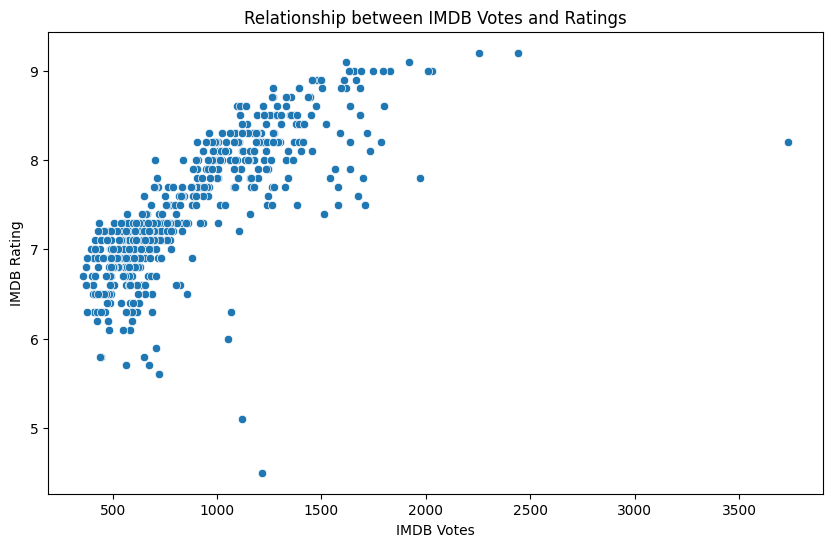

Correlation coefficient between IMDB votes and ratings: 0.7805560770639178


In [14]:
prompt_analysis = f"""
You are a data scientist specialized in analysing entertainment content. You are working on the show series
"The Simpsons", investigating patterns in the series series_data. 
How can we evaluate the relationship between episode ratings ('episode_imdb_rating', 'episode_imdb_votes')
and audiences ('episode_us_viewers_in_millions', 'episode_views') in "series_data.csv", considering it a CSV file
splitted by ';' with columns:

- episode_id: episode unique identifier
- episode_season: episode season number
- episode_original_air_date: date that the episode was first exhibited
- episode_imdb_rating: episode with the IMDB rating 
- episode_imdb_votes: episode with the number of voters
- episode_us_viewers_in_millions: number of episode viewers (in millions)
- episode_views: total number of episode views.

Implement the analysis described below in python.
Output only the code, no need for explanations.
## ANALYSIS
{analysis[2]}
"""

# Definir a chave de API do Gemini (use a chave fornecida pela sua conta)
genai.configure(api_key=os.environ["GEMINI_KEY"])
model = genai.GenerativeModel("gemini-1.5-flash")
response = model.generate_content(prompt_analysis)
# print(response.text)

analysis_code = response.text.replace("```python\n",'').replace("\n```",'')
exec(analysis_code)

# Chain of Thought Prompting

3) Tarefa: Chain-of-thoughts para criação do dashboard de interação com os atores

Usar o LLM para gerar um código Python para implementar um dashboard streamlit com a interação entre o usuários e os atores.

In [ ]:
# Prompt 1: criar um hello world com streamlit
# Prompt 2: criar YAML (meta prompt dos personagens)
# Prompt 3: adicionar a sua leitura no streamlit
# Prompt 4: criar explicacao em Markdown para contextualizar o usuario
# Prompt 5: criar interfaces para o usuario escolher persona e escrever o chat
# Prompt 6: adicionar a interacao com o LLM
# Rodar os codigos gerados

In [19]:
# Definir a chave de API do Gemini (use a chave fornecida pela sua conta)
prompt1 = """
criar um codigo hello world com streamlit.
Escrever somente o codigo, sem explicação.
"""

genai.configure(api_key=os.environ["GEMINI_KEY"])
model = genai.GenerativeModel("gemini-1.5-flash")
response = model.generate_content(prompt1)
print(response.text)


```python
import streamlit as st

st.title('Hello World!')
```


In [25]:
# Definir a chave de API do Gemini (use a chave fornecida pela sua conta)
prompt2 = """
Escrever um arquivo YAML com uma chave prompt que contenha o prompt
para instruir o LLM a se comportar como um personagem do show The Simpsons

Escrever somente o codigo, sem explicação.

"""

genai.configure(api_key=os.environ["GEMINI_KEY"])
model = genai.GenerativeModel("gemini-1.5-flash")
response = model.generate_content(prompt2)
print(response.text)


```yaml
prompt: "Você é um personagem do The Simpsons. Responda como esse personagem falaria e agiria. Use a linguagem e o estilo adequados ao personagem escolhido. Lembre-se de se manter fiel à personalidade e ao comportamento do personagem."
```


In [28]:
# Definir a chave de API do Gemini (use a chave fornecida pela sua conta)
prompt3 = """
Escreva uma aplicacao streamlit que leia o arquivo prompts.yaml e exponha na tela
o seu conteudo.

Escrever somente o codigo, sem explicação.

"""

genai.configure(api_key=os.environ["GEMINI_KEY"])
model = genai.GenerativeModel("gemini-1.5-flash")
response = model.generate_content(prompt3)
print(response.text)


```python
import streamlit as st
import yaml

st.title("Conteúdo do arquivo prompts.yaml")

with open('prompts.yaml', 'r') as file:
  prompts = yaml.safe_load(file)

st.json(prompts)
```


In [26]:
codelines = response.text.replace("```yaml\n",'').replace("\n```",'')
with open('prompts.yaml','w') as fid:
    fid.write(codelines)


In [29]:
codelines = response.text.replace("```python\n",'').replace("\n```",'')
with open('dashboard.py','w') as fid:
    fid.write(codelines)


# Generated Knowledge Prompting

4. Tarefa: utilizar técnica de Generated Knowledge para gerar Insights

Usar o LLM como um cientista de dados para gerar insights de acordo com a estatística e análises realizadas na base de dados.

# Modelos NLI para Avaliar Prompts

4. Tarefa: utilizar modelo BART-NLI para categorizar os episódios para diferentes faixas etárias

### Classificação de Contradições

In [36]:
from transformers import pipeline

# Carrega o modelo NLI
nli_model = pipeline("text-classification", model="facebook/bart-large-mnli")

def valida_resposta(entrada, resposta):
    # Usa o modelo NLI para verificar a relação entre entrada e resposta
    resultado = nli_model(f"{entrada} {resposta}")
    if resultado[0]['label'] == "contradiction":
        return "Resposta bloqueada por inconsistência ou conteúdo ofensivo."
    return resposta


# Exemplo de uso da função `valida_resposta`
entrada = "Explique o conceito de física quântica de forma simples."
resposta = "Física quântica é a ciência do muito pequeno. Mas você nunca vai entender isso!" # ofensivo
# resposta = 'Que burro!' # ofensivo
# resposta = "Física quântica é a ciência do muito pequeno." # corretp
# resposta = "Física quântica é a ciência do grande." # incorreto

# Chamada do pipeline de validação
resultado = valida_resposta(entrada, resposta)
print(resultado)  # Exibe "Resposta bloqueada por inconsistência ou conteúdo ofensivo."


Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


1
Resposta bloqueada por inconsistência ou conteúdo ofensivo.


### Classificação de Labels com Zero-shot

In [66]:
from transformers import pipeline
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")
# sequence_to_classify = "Que burro!"
# sequence_to_classify = "Explique o conceito de física quântica de forma simples."
sequence_to_classify = "My friend, this is 'Zé Cachaça', a colleague from Brazil"
candidate_labels = ['offensive', 'alcohol', 'sex', 'non-offensive']
predicted_labels = classifier(sequence_to_classify, candidate_labels)
predicted_labels

/home/ciodaro/Programs/anaconda3/envs/eng-prompt/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


{'sequence': "My friend, this is 'Zé Cachaça', a colleague from Brazil",
 'labels': ['alcohol', 'non-offensive', 'offensive', 'sex'],
 'scores': [0.9649195075035095,
  0.014620142988860607,
  0.011393223889172077,
  0.009067134000360966]}

In [113]:
from pandarallel import pandarallel
from transformers import pipeline

def nli_classification(sequence_to_classify):
    classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")
    # candidate_labels = ['offensive', 'alcohol', 'sex', 'non-offensive']
    candidate_labels = ['offensive', 'non-offensive']

    sequence_to_classify = f"""
    Classify the sentence given that it comes from a comedy show:
    - {sequence_to_classify}
    """
    
    label_dict = classifier(sequence_to_classify, candidate_labels)
    label_dict.pop('sequence')
    return label_dict


pandarallel.initialize(nb_workers=4)

episode_season = 5
episode_id = 92
X = (data[(data.episode_season == episode_season) &
          (data.episode_id == episode_id)].sort_values('number')
)
X = X.dropna(subset='normalized_text')

X = X.iloc[:4]
X['nli_labels'] = X.normalized_text.parallel_apply(lambda x: nli_classification(x))


INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


/home/ciodaro/Programs/anaconda3/envs/eng-prompt/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
/home/ciodaro/Programs/anaconda3/envs/eng-prompt/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.wa

In [114]:
X.iloc[:4].normalized_text.tolist()

['dad weve been robbed',
 'wake up dad wake up there was a burglar and he took my saxophone',
 'woo hoo',
 'and our portable tv']

In [115]:
X.nli_labels

Y = pd.json_normalize(X.nli_labels)
Y = Y.explode(['labels','scores'])
Y

,labels,scores
0,non-offensive,0.757714
0,offensive,0.242286
1,non-offensive,0.719318
1,offensive,0.280682
2,non-offensive,0.637548
2,offensive,0.362452
3,non-offensive,0.822706
3,offensive,0.177294


In [121]:
nli_classification('please come ass soon as possible')

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


{'labels': ['non-offensive', 'offensive'],
 'scores': [0.6086537837982178, 0.39134615659713745]}

# Prompt Injection

5) Tarefa: Injeção de Prompting Alterando Personagens
6) 
Simular injeções de prompting para alterar o comportamento de Atores baseados em LLMs.

# Prompt-Chaining

6) Tarefa: Prompt-Chaining para moderação de discurso

Implementar um Agente Revisor para condicionar as falas à classificação etária.

# Batch Prompting

In [63]:
from openai import OpenAI

client = OpenAI(
    api_key=os.environ['OPENAI_KEY'],
)

# Prompts individuais para comparação de custo
prompts_individuais = [
    "Classifique o sentimento: 'Muito bom produto!'",
    "Extraia palavras-chave: 'Serviço de entrega rápida e eficiente.'",
    "Resuma: 'Inteligência artificial está revolucionando vários setores.'"
]

# Calculo do custo total em tokens para requisições individuais
total_tokens_individuais = 0
responses_individuals = []
for prompt in prompts_individuais:
    response = client.completions.create(
        model="gpt-3.5-turbo-instruct",
        prompt=prompt,
        max_tokens = 50,
        temperature=1,
    )
    # response = client.completion.create(engine="gpt-4", prompt=prompt, max_tokens=50)
    total_tokens_individuais += response.usage.total_tokens
    responses_individuals.append(response.choices[0].text.strip().split('\n'))

# Prompt em lote para economia de tokens
prompt_batch = """
1. Classifique o sentimento: 'Muito bom produto!'
2. Extraia palavras-chave: 'Serviço de entrega rápida e eficiente.'
3. Resuma: 'Inteligência artificial está revolucionando vários setores.'
"""
response = client.completions.create(
    model="gpt-3.5-turbo-instruct",
    prompt=prompt_batch,
    max_tokens=150,
    temperature=1,
)
tokens_batch = response.usage.total_tokens
responses_batch = response.choices[0].text.strip().split('\n')

print("Tokens em prompts individuais:", total_tokens_individuais)
print("Tokens em batch prompting:", tokens_batch)


Tokens em prompts individuais: 152
Tokens em batch prompting: 96


In [64]:
responses_individuals

[['Positivo'],
 ['1. Serviço ',
  '2. Entrega ',
  '3. Rápida ',
  '4. Eficiente ',
  '5. Entrega rápida ',
  '6. Entrega eficiente ',
  '7. Serviço de entrega ',
  '8. Entrega'],
 ['A inteligência artificial (IA) é uma área da ciência da computação que busca criar sistemas que possam realizar tarefas que geralmente exigem a inteligência humana. Esses sistemas são projetados para aprender, racioc']]

In [65]:
responses_batch

['1. Sentimento: Positivo ',
 '2. Palavras-chave: Serviço, entrega, rápida, eficiente ',
 '3. Resumo: IA revolucionando setores.']

## Sumarização Personas

7) Tarefa: Sumarizador de personas com Batch-prompting

Utilizar técnicas de chunks para consolidar as características do personagem segundo suas falas.

In [4]:
from summarizer import ChunkSummary
import json


system_prompt = f"""
You are an editor assistant from the "The Simpsons" show.
You will receive the subtitles from real episodes in the format:
<location>, <character> said: <character line>
"""
user_prompt = f"""
You must create a summary of the episode, pointing out the most
relevant information and key players in the story. Bare in mind
that the summary must describe how the episode started, which key
points are relevant along the story and its gran finale.
"""

# Filtrar dados
episode_season = 5
episode_id = 92
X = (data[(data.episode_season == episode_season) &
          (data.episode_id == episode_id)].sort_values('number')
)
X = X.dropna(subset='normalized_text')

episode_summarizer = ChunkSummary(
    model_name = "gemini-1.5-flash",
    apikey = os.environ["GEMINI_KEY"],
    text = X['line'].tolist(),
    window_size = 40,
    overlap_size = 5,
    system_prompt=system_prompt,
)

episode_summary = episode_summarizer.summarize(user_prompt)
episode_summary = json.loads(episode_summary.replace("```json\n",'').replace("\n```",''))

Summarizing text
Summarizing chunk 1 from 7
Summarizing chunk 2 from 7
Summarizing chunk 3 from 7
Summarizing chunk 4 from 7
Summarizing chunk 5 from 7
Summarizing chunk 6 from 7
Summarizing chunk 7 from 7
Interacting


In [5]:
episode_summary

{'assistant': "The episode begins with a series of burglaries in Springfield, targeting various homes and even the police station. Chief Wiggum, despite his best efforts, fails to catch the culprit. Meanwhile, Homer, inspired by a vigilante movie, decides to form his own posse to clean up Springfield. However, his actions quickly escalate into abuse of power, leading to more crime than prevention. The episode then shifts focus to the cat burglar, who is revealed to be Molloy, a resident of Springfield Retirement Castle. Molloy, despite his crimes, charms the residents and is about to be released until Mayor Quimby bribes Chief Wiggum. Homer, believing he caught Molloy, is excited about finding the stolen treasure. Molloy reveals the treasure's location, causing a frenzy in Springfield as everyone rushes to find it. However, it turns out to be a prank by Molloy, who escapes with the treasure while leaving a note for the townspeople. The episode ends with everyone digging in the park, fr

In [15]:
from summarizer import ChunkSummary
import json

# Filtrar dados
episode_season = 5
# episode_id = 92
character_name = 'lisa simpson'


system_prompt = f"""
You are an editor assistant from the "The Simpsons" show.
You will receive the subtitles from real episodes in the format:
<episode number> | <location>, <character> said: <character line>
"""

user_prompt = f"""
You must describe and summarize what happened to {character_name}
across all episodes from Seasons {episode_season}
"""


X = (data[(data.episode_season == episode_season) &
          (data.character_normalized_name == character_name)
     ].sort_values('number')
)
X = X.dropna(subset='normalized_text')

episode_summarizer = ChunkSummary(
    model_name = "gemini-1.5-flash",
    apikey = os.environ["GEMINI_KEY"],
    text = X['line'].tolist(),
    window_size = 40,
    overlap_size = 5,
    system_prompt=system_prompt,
)

episode_summary = episode_summarizer.summarize(user_prompt)
# episode_summary = json.loads(episode_summary.replace("```json\n",'').replace("\n```",''))

Summarizing text
Summarizing chunk 1 from 9
Summarizing chunk 2 from 9
Summarizing chunk 3 from 9
Summarizing chunk 4 from 9
Summarizing chunk 5 from 9
Summarizing chunk 6 from 9
Summarizing chunk 7 from 9
Summarizing chunk 8 from 9
Summarizing chunk 9 from 9
Interacting


In [19]:
episode_summary.replace("```json\n",'').replace("\n```",'')

'{\n "assistant": "Lisa Simpson in Season 5 is a complex and multifaceted character who navigates a variety of challenges and experiences. She is a strong advocate for her beliefs, standing up for animal rights, criticizing sexist messages in toys, and trying to make the world a better place. She is also a thoughtful and compassionate character who cares deeply for her family and friends, often trying to help them through difficult situations. \n\nHere are some of the key events and experiences Lisa faces in Season 5:\n\n* **Dealing with Bart\'s antics:** Lisa often finds herself exasperated by her brother Bart\'s mischievous behavior, but she also tries to understand him and help him when he\'s struggling.\n* **Musical aspirations:** Lisa\'s passion for music is a recurring theme, and she faces challenges like having her saxophone stolen and trying to find her own musical voice.\n* **Social justice:** Lisa is a strong advocate for social justice, protesting against the imprisonment of

## Extração de Palavras Chave

8) Tarefa: Extração de palavras chaves dos episódios por chunks

Utilizar Batch Prompting para extrair palavras chave nos episódios.


## KDB para atividades Q/A

9) Tarefa: Aplicação de KDB para Otimizar Prompts
10) 
Interface para QA com um assistente especialista em Simpsons.

## Código Base

In [21]:
# Instale as bibliotecas necessárias, caso ainda não as tenha
# !pip install faiss-cpu sentence-transformers

import faiss
from sentence_transformers import SentenceTransformer
import numpy as np

# Lista de strings que queremos indexar
texts = [
    "Eu adoro aprender sobre inteligência artificial.",
    "Faiss é uma ótima ferramenta para buscas vetoriais.",
    "Python é uma linguagem de programação versátil.",
    "Machine learning está revolucionando várias indústrias.",
    "Deep learning é uma área fascinante da IA."
]

# Carregar o modelo de embeddings
# model_name = 'neuralmind/bert-base-portuguese-cased'
model_name = 'all-MiniLM-L6-v2'
llm_model_dir = '../data/bertimbau/'
embedding_model = SentenceTransformer(
    model_name, 
    cache_folder=llm_model_dir, 
    device='cpu'
)
# Converter as strings para embeddings
embeddings = embedding_model.encode(texts)
# Converter os embeddings para um array NumPy, necessário para Faiss
embeddings = np.array(embeddings).astype("float32")
# Criar o índice Faiss
d = embeddings.shape[1]  # Dimensão dos embeddings
index = faiss.IndexFlatL2(d)  # Usando L2 (distância euclidiana) como métrica
# index = faiss.IndexFlatIP(d)  # Usando inner product metric (relacionado com angulo entre embeddings)
# Adicionar os embeddings ao índice
index.add(embeddings)
# Verificar quantos vetores foram adicionados
print("Número de vetores no índice:", index.ntotal)
# Exemplo de busca
query = "Qual é a utilidade do deep learning?"
query_embedding = embedding_model.encode([query]).astype("float32")
# Fazer a busca
k = 2  # número de resultados mais próximos
distances, indices = index.search(query_embedding, k)
# Mostrar os resultados
for i in range(k):
    print(f"Texto mais próximo {i+1}: {texts[indices[0][i]]} (distância: {distances[0][i]})")

/home/ciodaro/Programs/anaconda3/envs/eng-prompt/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Número de vetores no índice: 5
Texto mais próximo 1: Deep learning é uma área fascinante da IA. (distância: 0.5508567094802856)
Texto mais próximo 2: Eu adoro aprender sobre inteligência artificial. (distância: 1.1480979919433594)


## QA

In [73]:
import faiss
from sentence_transformers import SentenceTransformer
import numpy as np

# Filtrar dados
episode_season = 5
# episode_id = 92
# character_name = 'lisa simpson'

X = (data[(data.episode_season == episode_season) 
          # & (data.episode_id == episode_id) 
          # (data.character_normalized_name == character_name)
     ].sort_values(['episode_id', 'number'])
)
X = X.dropna(subset='normalized_text')

texts = X.line.tolist()

# Carregar o modelo de embeddings
model_name = 'all-MiniLM-L6-v2'
llm_model_dir = '../data/bertimbau/'
embedding_model = SentenceTransformer(
    model_name, 
    cache_folder=llm_model_dir, 
    device='cpu'
)
# Converter as strings para embeddings
embeddings = embedding_model.encode(texts)
# # Converter os embeddings para um array NumPy, necessário para Faiss
embeddings = np.array(embeddings).astype("float32")


/home/ciodaro/Programs/anaconda3/envs/eng-prompt/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [74]:
d = embeddings.shape[1]  # Dimensão dos embeddings
# index = faiss.IndexFlatL2(d)  # Usando L2 (distância euclidiana) como métrica
index = faiss.IndexFlatIP(d)
# Adicionar os embeddings ao índice
index.add(embeddings)
# Verificar quantos vetores foram adicionados
print("Número de vetores no índice:", index.ntotal)

Número de vetores no índice: 5161


In [101]:
import json
import google.generativeai as genai
from google.generativeai.types import HarmCategory, HarmBlockThreshold


# Exemplo de busca
query = "In episode 92, who is the cat burglar and how it was revealed?"
query_embedding = embedding_model.encode([query]).astype("float32")
# Fazer a busca
k = 20  # número de resultados mais próximos
distances, indices = index.search(query_embedding, k)
# Mostrar os resultados

db_text = '\n'.join([f"- {texts[indices[0][i]]}" for i in range(k)])

# Adicionar as respostas ao prompt para pedir ao LLM que responda
# If the information needed to respond is not in <database>, respond 'I do not know'.

prompt = f"""
Respond to the <user question> considering the information retrieved from the <database>.
Read several lines to try to understand how to respond it. 


##
<user question>
{query}

##
<database>
{db_text}

##
The response must be formatted as a JSON with the field 'response'.
"""

# Definir a chave de API do Gemini (use a chave fornecida pela sua conta)
safety_settings={
    HarmCategory.HARM_CATEGORY_HATE_SPEECH: HarmBlockThreshold.BLOCK_NONE,
    HarmCategory.HARM_CATEGORY_HARASSMENT: HarmBlockThreshold.BLOCK_NONE,
    HarmCategory.HARM_CATEGORY_SEXUALLY_EXPLICIT: HarmBlockThreshold.BLOCK_NONE,
    HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: HarmBlockThreshold.BLOCK_NONE,
}
generation_config = {
    'temperature': 0.1,
    # 'top_p': 0.8,
    # 'top_k': 20,
    'max_output_tokens': 100,
    # 'candidate_count': 8 # nao funciona em Gemini Flash
}
genai.configure(api_key=os.environ["GEMINI_KEY"])
model = genai.GenerativeModel(
    "gemini-1.5-flash",
    safety_settings=safety_settings,
    generation_config=generation_config,
)
candidate_count = 8
# response = model.generate_content(prompt)
responses = [model.generate_content(prompt) for i in range(candidate_count)]
responses = [r.text.replace("```json\n",'').replace("\n```",'') for r in responses]
responses = [json.loads(r)['response'] for r in responses]
# print(response.text)

In [102]:
responses

['In episode 92, the cat burglar is revealed to be Mr. Molloy, a resident of the Springfield Retirement Castle.  Homer discovers this after his father, Grampa Simpson, tells him that he knows who the cat burglar is.  Homer then confronts Mr. Molloy at the retirement castle, and Mr. Molloy admits to being the cat burglar.',
 "In episode 92, the cat burglar is revealed to be Mr. Molloy, a resident of the Springfield Retirement Castle.  Homer catches him after Mr. Molloy tries to rob the Springfield Museum.  Homer's father, Grampa Simpson, had previously told Homer that he knew who the cat burglar was, but he didn't reveal it until after Homer had already caught Mr. Molloy.",
 "In episode 92, the cat burglar is revealed to be Mr. Molloy, a resident of the Springfield Retirement Castle.  Homer catches him after Mr. Molloy tries to rob the Springfield Museum.  Homer's father, Grampa Simpson, had previously told Homer that he knew who the cat burglar was, but he didn't reveal it until after 